## **Fisher Information**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, poisson, norm
np.set_printoptions(precision=4)

**Exercise 1:** Analysie the following code and fill in the missing lines. The code solves the following problem (except the analytical part):

Let $ X \sim \text{Bernoulli}(p) $ with probability mass function  
$$
f(x; p) = p^x(1-p)^{1-x}, \quad x \in \{0,1\}.
$$

1. Show that the log-likelihood for a single observation is
   $$
   \ell(p; X) = X \ln p + (1 - X) \ln (1 - p).
   $$

2. Compute the first derivative (score function)  
   $$
   \frac{\partial \ell}{\partial p}
   = \frac{X}{p} - \frac{1 - X}{1 - p}.
   $$

3. Using the definition  
   $$
   I_1(p) = \mathbb{E}\!\left[\left(\frac{\partial \ell}{\partial p}\right)^2\right],
   $$
   show analytically that  
   $$
   I_1(p) = \frac{1}{p(1 - p)}.
   $$

4. Verify this numerically by Monte Carlo simulation. That is, you can estimate the expectation by simulation — generate many Bernoulli samples, compute the score for each, square it, and take the average.


In [ ]:
# Analytical Fisher information
def fisher_bernoulli(p):
    return 1 / (p * (1 - p))

# Numerical check using the score function
def score(x, p):
    # derivative of log-likelihood wrt p
    return (x / p) - ((1 - x) / (1 - p))

p = 0.3
N = 10000
samples = bernoulli.rvs(p, size=N)
scores = score(samples, p)
I_num = np.mean(scores**2)

print(f"Analytical Fisher Information: {fisher_bernoulli(p):.4f}")
print(f"Numerical estimate: {I_num:.4f}")

Analytical Fisher Information: 4.7619
Numerical estimate: 4.7519


Analytical Fisher Information: 4.7619
Numerical estimate: 4.8425


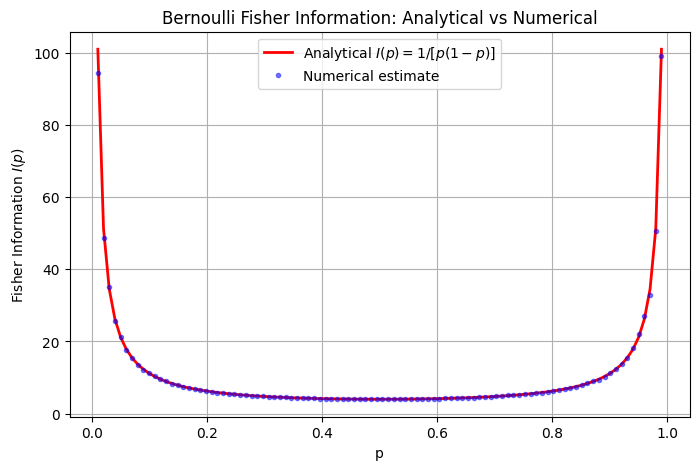

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Analytical Fisher information for Bernoulli(p)
def fisher_bernoulli(p):
    return 1 / (p * (1 - p))

# Score function: derivative of log-likelihood wrt p
def score(x, p):
    return x / p - (1 - x) / (1 - p)

# Choose a single p and check numerically
p = 0.3          # parameter
N = 900    # number of samples
samples = bernoulli.rvs(p, size=N)
scores = score(samples, p)
I_num = np.mean(scores**2)

print(f"Analytical Fisher Information: {fisher_bernoulli(p):.4f}")
print(f"Numerical estimate: {I_num:.4f}")

# --- Optional: visualize I(p) over a range of p values ---

p_vals = np.linspace(0.01, 0.99, 100)
I_analytic = fisher_bernoulli(p_vals)

# Numerical approximation across p values
I_num_list = []
N_plot = 50000
for p_i in p_vals:
    X = bernoulli.rvs(p_i, size=N_plot)
    I_num_list.append(np.mean(score(X, p_i)**2))
I_num_list = np.array(I_num_list)

# Plot
plt.figure(figsize=(8,5))
plt.plot(p_vals, I_analytic, 'r-', lw=2, label='Analytical $I(p) = 1/[p(1-p)]$')
plt.plot(p_vals, I_num_list, 'bo', ms=3, alpha=0.5, label='Numerical estimate')
plt.xlabel('p')
plt.ylabel('Fisher Information $I(p)$')
plt.title('Bernoulli Fisher Information: Analytical vs Numerical')
plt.legend()
plt.grid(True)
plt.show()


### Understanding the code: what is Monte Carlo and how does it work?



**1. Random sampling**

```python
samples = bernoulli.rvs(p, size=N)
```

This line generates `N = 100_000` independent draws from a Bernoulli(p) distribution.  
Each draw is either 0 or 1, representing one simulated outcome of the random variable X.

These random draws form the **Monte Carlo sample**.  
The idea is that by simulating many possible realizations of X, we can approximate theoretical expectations numerically.

---

**2. Computing the score function**

```python
scores = score(samples, p)
```

For each simulated observation `X_i`, we compute the score

$$s(X_i, p) = X_i / p - (1 - X_i) / (1 - p)$$

The "score" measures how sensitive the log-likelihood is to changes in the parameter p at each observation.

---

**3. Estimating the Fisher Information**

```python
I_num = np.mean(scores**2)
```

The Fisher Information for one observation is defined as

$$I_1(p) = E[s(X, p)^2]$$

Since expectations are difficult to compute analytically in many models,  
we approximate them by the **sample mean** of the squared scores:

$$I_1(p) ≈ (1 / N) * Σ s(X_i, p)^2$$

This is the key idea of Monte Carlo simulation — replace theoretical expectations by empirical averages over many random samples.

---

**4. Comparing results**

Finally, we print both the analytical result and the simulated one:

```python
print(f"Analytical Fisher Information: {fisher_bernoulli(p):.4f}")
print(f"Numerical estimate from simulation: {I_num:.4f}")
```

If the Monte Carlo estimate is close to the analytical value,  
it confirms that our simulation correctly approximates the theoretical Fisher Information.

**Exercise 2: Additivity of Fisher information**

Let $X_1, \ldots, X_n$ be i.i.d. Bernoulli$(p)$ random variables.  
The log-likelihood for the sample is  

$$
\ell_n(p) = \sum_{i=1}^n \ell(p; X_i),
$$

and therefore the Fisher Information for the sample satisfies  

$$
I_n(p) = n\, I_1(p).
$$

Verify this property by simulation.

In [ ]:
def fisher_sample(p, n, N=5000):
    def score(x, p): return (x / p) - ((1 - x) / (1 - p))
    I_est = []
    for _ in range(N):
        X = bernoulli.rvs(p, size=n)
        s = np.sum(score(X, p))
        I_est.append(s**2)
    return np.mean(I_est)

p = 0.3
for n in [1, 2, 5, 10]:
    print(f"n = {n:2d} |  Estimated I_n ≈ {fisher_sample(p, n):.4f} | Expected = {n * 1/(p*(1-p)):.4f}")


n =  1 |  Estimated I_n ≈ 4.7728 | Expected = 4.7619
n =  2 |  Estimated I_n ≈ 9.3751 | Expected = 9.5238
n =  5 |  Estimated I_n ≈ 23.5102 | Expected = 23.8095
n = 10 |  Estimated I_n ≈ 49.4603 | Expected = 47.6190


**Exercise 3:**

Let $X_1, \ldots, X_n$ be i.i.d. $\text{Poisson}(\lambda)$ random variables with pmf  

$$
f(x; \lambda) = e^{-\lambda} \frac{\lambda^x}{x!}, \quad x = 0,1,2,\ldots
$$

1. Show that the likelihood of the sample is  

   $$
   L(\lambda; x_1,\ldots,x_n)
   = e^{-n\lambda}\frac{\lambda^{\sum x_i}}{\prod x_i!}.
   $$

   Hence, the sample depends on $\lambda$ only through  

   $$
   S = \sum_{i=1}^n X_i.
   $$

   Conclude that $S$ is a sufficient statistic for $\lambda$.

2. Verify empirically that estimators based on $S$ and on the full sample give identical results.

In [ ]:
λ = 3

N = 10_000


X = poisson.rvs(λ, size=(N, n))
S = np.sum(X, axis=1)

lambda_hat_full = np.mean(X, axis=1).mean()
lambda_hat_sufficient = S.mean() / n

print(f"Estimator using full sample:       {lambda_hat_full:.4f}")
print(f"Estimator using sufficient S = ΣX: {lambda_hat_sufficient:.4f}")

Estimator using full sample:       2.9968
Estimator using sufficient S = ΣX: 2.9968
